# Industriel Engineering 
#### **Presented By :       Lian Refaelov , Shifra Fuchs, Osher Moyal , Dolev Levavi**

- Wrangling the data and Understanding it
- Audience Quiz: The most wanted position, The specialization where you earn the most
- Facility vs Salary
- Specialization vs Salary 
- Position vs Salary

### *Wrangling the data and Understanding it*

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
font1 = {'family':'serif','color':'darkorange','size':25}
font2 = {'family':'serif','color':'purple','size':15}

In [61]:
url = "IndustrielEngineeringData.csv"
industriel_data_df = pd.read_csv(url)
industriel_data_df.head()

,תאריך,סטטוס,מוסד לימודי,תחום,תפקיד,חברה,ניסיון,משכורת,סוג תשלום,הערות,רכב
0,08/01/2019 11:41,סטודנט/ית,אוניברסיטה פתוחה,NaN,ניתוח נתונים,NaN,2+,20000.0,גלובלי,NaN,NaN
1,08/01/2019 11:49,סטודנט/ית,אוניברסיטה פתוחה,הייטק,QA,Oracle,2+,30000.0,גלובלי,NaN,לא
2,08/01/2019 12:03,סטודנט/ית,אוניברסיטה פתוחה,מוסד ממשלתי,רכז פרוייקטים,NaN,1,3000.0,שעתי,NaN,לא
3,08/01/2019 12:05,סטודנט/ית,אוניברסיטה פתוחה,מוסד ממשלתי,ניתוח נתונים,ZIM,1,40.0,שעתי,NaN,לא
4,08/01/2019 12:09,סטודנט/ית,אוניברסיטה פתוחה,הייטק,ניהול פרוייקטים PMO,AtoZ,1,12000.0,גלובלי,NaN,לא


In [62]:
industriel_data_df.columns = ['Date', 'Status', 'Facility', 'Classification', 'Specialization', 'Company', 'Experience', 'Salary', 'Salary_kind', 'Remarks', 'Car']
industriel_data_df.head()

,Date,Status,Facility,Classification,Specialization,Company,Experience,Salary,Salary_kind,Remarks,Car
0,08/01/2019 11:41,סטודנט/ית,אוניברסיטה פתוחה,NaN,ניתוח נתונים,NaN,2+,20000.0,גלובלי,NaN,NaN
1,08/01/2019 11:49,סטודנט/ית,אוניברסיטה פתוחה,הייטק,QA,Oracle,2+,30000.0,גלובלי,NaN,לא
2,08/01/2019 12:03,סטודנט/ית,אוניברסיטה פתוחה,מוסד ממשלתי,רכז פרוייקטים,NaN,1,3000.0,שעתי,NaN,לא
3,08/01/2019 12:05,סטודנט/ית,אוניברסיטה פתוחה,מוסד ממשלתי,ניתוח נתונים,ZIM,1,40.0,שעתי,NaN,לא
4,08/01/2019 12:09,סטודנט/ית,אוניברסיטה פתוחה,הייטק,ניהול פרוייקטים PMO,AtoZ,1,12000.0,גלובלי,NaN,לא


In [63]:
industriel_data_df['Date'] = pd.to_datetime(industriel_data_df['Date'])
industriel_data_df['Year'] = pd.DatetimeIndex(industriel_data_df['Date']).year
industriel_data_df.head()

,Date,Status,Facility,Classification,Specialization,Company,Experience,Salary,Salary_kind,Remarks,Car,Year
0,2019-08-01 11:41:00,סטודנט/ית,אוניברסיטה פתוחה,NaN,ניתוח נתונים,NaN,2+,20000.0,גלובלי,NaN,NaN,2019
1,2019-08-01 11:49:00,סטודנט/ית,אוניברסיטה פתוחה,הייטק,QA,Oracle,2+,30000.0,גלובלי,NaN,לא,2019
2,2019-08-01 12:03:00,סטודנט/ית,אוניברסיטה פתוחה,מוסד ממשלתי,רכז פרוייקטים,NaN,1,3000.0,שעתי,NaN,לא,2019
3,2019-08-01 12:05:00,סטודנט/ית,אוניברסיטה פתוחה,מוסד ממשלתי,ניתוח נתונים,ZIM,1,40.0,שעתי,NaN,לא,2019
4,2019-08-01 12:09:00,סטודנט/ית,אוניברסיטה פתוחה,הייטק,ניהול פרוייקטים PMO,AtoZ,1,12000.0,גלובלי,NaN,לא,2019


In [64]:
industriel_data_df.dtypes

Date              datetime64[ns]
Status                    object
Facility                  object
Classification            object
Specialization            object
Company                   object
Experience                object
Salary                   float64
Salary_kind               object
Remarks                   object
Car                       object
Year                       int64
dtype: object

##### droping unnecessary columns and fixing missing values

In [66]:
industriel_data_df.isnull().sum().sort_values(ascending=False)

Remarks           278
Company           238
Car                19
Classification      1
Year                0
Salary_kind         0
Salary              0
Experience          0
Specialization      0
Facility            0
Status              0
Date                0
dtype: int64

In [67]:
irrelevant_columns=['Remarks','Date']
industriel_data_df.drop(irrelevant_columns,axis='columns' ,inplace=True)
industriel_data_df["Company"].fillna("לא הוזן",inplace=True)
industriel_data_df["Car"].fillna("לא הוזן",inplace=True)
industriel_data_df["Classification"].fillna("לא הוזן",inplace=True)
industriel_data_df.head()

,Status,Facility,Classification,Specialization,Company,Experience,Salary,Salary_kind,Car,Year
0,סטודנט/ית,אוניברסיטה פתוחה,לא הוזן,ניתוח נתונים,לא הוזן,2+,20000.0,גלובלי,לא הוזן,2019
1,סטודנט/ית,אוניברסיטה פתוחה,הייטק,QA,Oracle,2+,30000.0,גלובלי,לא,2019
2,סטודנט/ית,אוניברסיטה פתוחה,מוסד ממשלתי,רכז פרוייקטים,לא הוזן,1,3000.0,שעתי,לא,2019
3,סטודנט/ית,אוניברסיטה פתוחה,מוסד ממשלתי,ניתוח נתונים,ZIM,1,40.0,שעתי,לא,2019
4,סטודנט/ית,אוניברסיטה פתוחה,הייטק,ניהול פרוייקטים PMO,AtoZ,1,12000.0,גלובלי,לא,2019


In [68]:
industriel_data_df.isnull().sum().sort_values(ascending=False)

Year              0
Car               0
Salary_kind       0
Salary            0
Experience        0
Company           0
Specialization    0
Classification    0
Facility          0
Status            0
dtype: int64

1

In [69]:
industriel_data_df.head()

,Status,Facility,Classification,Specialization,Company,Experience,Salary,Salary_kind,Car,Year
0,סטודנט/ית,אוניברסיטה פתוחה,לא הוזן,ניתוח נתונים,לא הוזן,2+,20000.0,גלובלי,לא הוזן,2019
1,סטודנט/ית,אוניברסיטה פתוחה,הייטק,QA,Oracle,2+,30000.0,גלובלי,לא,2019
2,סטודנט/ית,אוניברסיטה פתוחה,מוסד ממשלתי,רכז פרוייקטים,לא הוזן,1,3000.0,שעתי,לא,2019
3,סטודנט/ית,אוניברסיטה פתוחה,מוסד ממשלתי,ניתוח נתונים,ZIM,1,40.0,שעתי,לא,2019
4,סטודנט/ית,אוניברסיטה פתוחה,הייטק,ניהול פרוייקטים PMO,AtoZ,1,12000.0,גלובלי,לא,2019


In [70]:
pd.unique(industriel_data_df.Facility)

array(['אוניברסיטה פתוחה', 'אוניברסיטת אריאל', 'אוניברסיטת בר אילן',
       'אוניברסיטת חיפה', 'אוניברסיטת תל אביב', 'בן גוריון',
       'האקדמית עמק יזרעאל', 'האקדמית תל אביב יפו',
       'המכללה להנדסה ירושלים', 'המכללה למינהל', 'המרכז האקדמי לב',
       'טכניון', 'לא מהנדס , הנדסאי', 'מוסד ממש טוב', 'מכללת אורט בראודה',
       'מכללת אפקה', 'מכללת סמי שמעון', 'מכללת ספיר', 'מכללת רופין',
       'מכללת שנקר'], dtype=object)

In [71]:
industriel_data_df.drop(industriel_data_df[industriel_data_df.Facility == "מוסד ממש טוב"].index, inplace=True)
industriel_data_df.drop(industriel_data_df[industriel_data_df.Facility == "לא מהנדס , הנדסאי"].index, inplace=True)

In [72]:
pd.unique(industriel_data_df.Facility)

array(['אוניברסיטה פתוחה', 'אוניברסיטת אריאל', 'אוניברסיטת בר אילן',
       'אוניברסיטת חיפה', 'אוניברסיטת תל אביב', 'בן גוריון',
       'האקדמית עמק יזרעאל', 'האקדמית תל אביב יפו',
       'המכללה להנדסה ירושלים', 'המכללה למינהל', 'המרכז האקדמי לב',
       'טכניון', 'מכללת אורט בראודה', 'מכללת אפקה', 'מכללת סמי שמעון',
       'מכללת ספיר', 'מכללת רופין', 'מכללת שנקר'], dtype=object)

In [73]:
#industriel_data_df.iloc[industriel_data_df[industriel_data_df.Facility == "בן גוריון"].index, 1] = "אוניברסיטת בן גוריון"

In [74]:
industriel_data_df.loc[industriel_data_df[industriel_data_df.Facility == "בן גוריון"].index, "Facility"] = "אוניברסיטת בן גוריון"

In [75]:
pd.unique(industriel_data_df.Facility)

array(['אוניברסיטה פתוחה', 'אוניברסיטת אריאל', 'אוניברסיטת בר אילן',
       'אוניברסיטת חיפה', 'אוניברסיטת תל אביב', 'אוניברסיטת בן גוריון',
       'האקדמית עמק יזרעאל', 'האקדמית תל אביב יפו',
       'המכללה להנדסה ירושלים', 'המכללה למינהל', 'המרכז האקדמי לב',
       'טכניון', 'מכללת אורט בראודה', 'מכללת אפקה', 'מכללת סמי שמעון',
       'מכללת ספיר', 'מכללת רופין', 'מכללת שנקר'], dtype=object)

In [76]:
my_type = []
for facility in industriel_data_df.Facility:
    if "אוניברסיטה" in facility or "אוניברסיטת" in facility:
        my_type.append("אוניברסיטה")
    elif "טכניון" in facility:
        my_type.append("אוניברסיטה")
    else:
        my_type.append("מכללה")
industriel_data_df['type'] = my_type
industriel_data_df

,Status,Facility,Classification,Specialization,Company,Experience,Salary,Salary_kind,Car,Year,type
0,סטודנט/ית,אוניברסיטה פתוחה,לא הוזן,ניתוח נתונים,לא הוזן,2+,20000.0,גלובלי,לא הוזן,2019,אוניברסיטה
1,סטודנט/ית,אוניברסיטה פתוחה,הייטק,QA,Oracle,2+,30000.0,גלובלי,לא,2019,אוניברסיטה
2,סטודנט/ית,אוניברסיטה פתוחה,מוסד ממשלתי,רכז פרוייקטים,לא הוזן,1,3000.0,שעתי,לא,2019,אוניברסיטה
3,סטודנט/ית,אוניברסיטה פתוחה,מוסד ממשלתי,ניתוח נתונים,ZIM,1,40.0,שעתי,לא,2019,אוניברסיטה
4,סטודנט/ית,אוניברסיטה פתוחה,הייטק,ניהול פרוייקטים PMO,AtoZ,1,12000.0,גלובלי,לא,2019,אוניברסיטה
...,...,...,...,...,...,...,...,...,...,...,...
474,סטודנט/ית,מכללת שנקר,הייטק,"ניתוח, עיצוב, איפיון והטמעה של מערכות מידע",FBC,1,5000.0,שעתי,לא,2021,מכללה
475,סטודנט/ית,מכללת שנקר,הייטק,Noc,Radware,1,70.0,שעתי,לא,2021,מכללה
476,סטודנט/ית,מכללת שנקר,הייטק,תפעול וייצור,לא הוזן,1,9500.0,גלובלי,לא,2021,מכללה
477,סטודנט/ית,מכללת שנקר,תעשייה מסורתית,ניתוח נתונים,לא הוזן,1,4000.0,שעתי,לא,2021,מכללה


### Histograms:

In [77]:
#features= ['Status', 'Facility', 'Experience', 'type']
#fig, axes=plt.subplots(2,2,figsize=(10,10))
#plt.subplots_adjust(wspace=0.5, hspace=0.3)
#axes=axes.flatten
#for i,att in enumerate(features):
#    sns.histplot(x=att, data=industriel_data_df, ax=axes[i])

#### Heat map in order to find correlations: (wont help... only 2 numeric collumns)

In [78]:
#corrs=industriel_data_df.corr(method='kendall')
#plt.figure(figsize=(10,10))
#sns.heatmap(corrs, cmap='coolwarm', center=0, annot=True)

# starting to play with data in order to find correlations:

## experience vs income graduate:

In [79]:
counts = pd.value_counts(industriel_data_df.Facility)

In [80]:
industriel_data_df_filter = industriel_data_df.loc[industriel_data_df.Facility.isin(counts[counts > 10].index), :]
industriel_data_df_filter = industriel_data_df_filter[industriel_data_df_filter.Status == "בוגר/ת"]

In [81]:
# sns.regplot(x='Salary', y='Experience', data= industriel_data_df)

## Specialization vs Salary:

In [82]:
pd.unique(industriel_data_df.Specialization)

array(['ניתוח נתונים', 'QA', 'רכז פרוייקטים', 'ניהול פרוייקטים PMO',
       'ניתוח, עיצוב, איפיון והטמעה של מערכות מידע, QA',
       'הנדסת ארגון ושיטות', 'ניתוח, עיצוב, איפיון והטמעה של מערכות מידע',
       'ניהול פרוייקטים,  PMO, ניתוח, עיצוב, איפיון והטמעה של מערכות מידע',
       'מיישם מערכות מידע', 'פלנר', 'אינטגרטור', 'תפעול וייצור',
       'תכנון ובקרה', 'רכש', 'ערכית תוכן , רשתות חברתיות',
       'ניהול פרוייקטים, PMO', 'ניהול פרוייקטים,  PMO',
       'ניתוח נתונים , ניתוח, עיצוב, איפיון והטמעה של מערכות מידע, QA',
       'Devops', 'הנדסת ארגון ושיטות, תפעול וייצור, לוגיסטיקה',
       'פתיחות תיקים ודוחות תפעוליים',
       'ניהול פרוייקטים,  PMO, ניתוח נתונים ',
       'פקיד מזונות, פתיחת תיקים ודוחות תפעוליים', 'הנדסת איכות',
       'הנדסת ארגון ושיטות, ייעוץ לוגיסטי', 'ניתוח נתונים , כלכלן',
       'ניהול מערכות מידע', 'ניתוח נתונים , הנדסת ארגון ושיטות',
       'ניתוח נתונים , מדעי נתונים ', 'ניהול פרוייקטים,  PMO, System',
       'הנדסת ארגון ושיטות, תפעול וייצור',
       '

### Dividing the data into six subgroups:

In [85]:
my_speciality = []
for speciality in industriel_data_df.Specialization:
    if "פרוייקטים" in speciality or "PMO" in speciality or "Product" in speciality:
        my_speciality.append("ניהול פרוייקטים")

    elif "ניתוח" in speciality or "אנאליסט" in speciality or "נתונים" in speciality:
        my_speciality.append("ניתוח נתונים")
        
    elif "רכש" in speciality or "ייצור" in speciality or "הטמעה" in speciality:
        my_speciality.append("ניהול היצור")
        
    elif "QA" in speciality:
        my_speciality.append("אבטחת איכות") 

    elif "ארגון ושיטות" in speciality:
        my_speciality.append("ארגון ושיטות")
        
    else:
        my_speciality.append("אחר")
industriel_data_df['speciality'] = my_speciality
industriel_data_df

,Status,Facility,Classification,Specialization,Company,Experience,Salary,Salary_kind,Car,Year,type,speciality
0,סטודנט/ית,אוניברסיטה פתוחה,לא הוזן,ניתוח נתונים,לא הוזן,2+,20000.0,גלובלי,לא הוזן,2019,אוניברסיטה,ניתוח נתונים
1,סטודנט/ית,אוניברסיטה פתוחה,הייטק,QA,Oracle,2+,30000.0,גלובלי,לא,2019,אוניברסיטה,אבטחת איכות
2,סטודנט/ית,אוניברסיטה פתוחה,מוסד ממשלתי,רכז פרוייקטים,לא הוזן,1,3000.0,שעתי,לא,2019,אוניברסיטה,ניהול פרוייקטים
3,סטודנט/ית,אוניברסיטה פתוחה,מוסד ממשלתי,ניתוח נתונים,ZIM,1,40.0,שעתי,לא,2019,אוניברסיטה,ניתוח נתונים
4,סטודנט/ית,אוניברסיטה פתוחה,הייטק,ניהול פרוייקטים PMO,AtoZ,1,12000.0,גלובלי,לא,2019,אוניברסיטה,ניהול פרוייקטים
...,...,...,...,...,...,...,...,...,...,...,...,...
474,סטודנט/ית,מכללת שנקר,הייטק,"ניתוח, עיצוב, איפיון והטמעה של מערכות מידע",FBC,1,5000.0,שעתי,לא,2021,מכללה,ניתוח נתונים
475,סטודנט/ית,מכללת שנקר,הייטק,Noc,Radware,1,70.0,שעתי,לא,2021,מכללה,אחר
476,סטודנט/ית,מכללת שנקר,הייטק,תפעול וייצור,לא הוזן,1,9500.0,גלובלי,לא,2021,מכללה,ניהול היצור
477,סטודנט/ית,מכללת שנקר,תעשייה מסורתית,ניתוח נתונים,לא הוזן,1,4000.0,שעתי,לא,2021,מכללה,ניתוח נתונים


In [86]:
pd.value_counts(industriel_data_df.speciality)

ניתוח נתונים       145
ניהול פרוייקטים    130
ניהול היצור         93
אחר                 68
ארגון ושיטות        32
אבטחת איכות          9
Name: speciality, dtype: int64

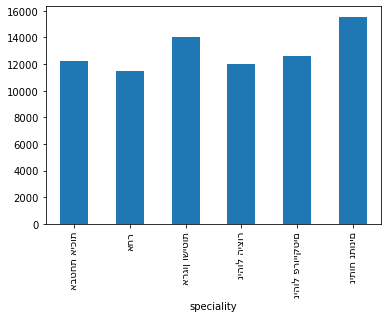

In [87]:
industriel_data_df[industriel_data_df.Status == 'בוגר/ת'].groupby("speciality").Salary.mean().plot(kind="bar")

## Specialization vs Amount:

Text(0.5, 1.0, 'specialization preference')

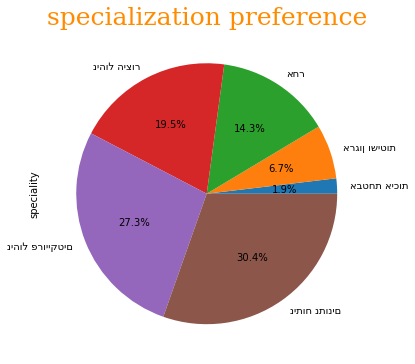

In [137]:
temp=industriel_data_df.groupby('speciality')['speciality'].count().sort_values()
temp.plot.pie(y="percentage",figsize=(6,6),autopct='%1.1f%%',legend=False)
plt.title("specialization preference",fontdict = font1)

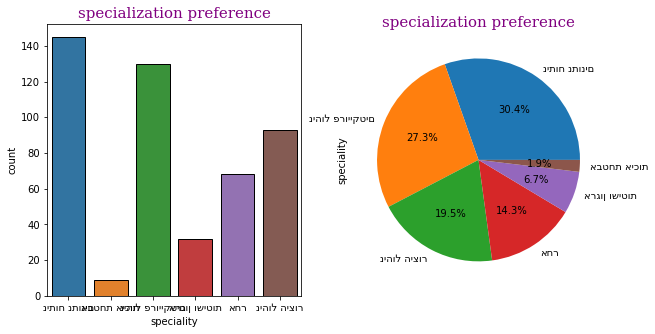

In [138]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.title("specialization preference" ,fontdict = font2) 
sns.countplot( x="speciality", data=industriel_data_df , edgecolor = 'black')
plt.subplot(1,2,2)
plt.title("specialization preference" ,fontdict = font2)
industriel_data_df['speciality'].value_counts().plot.pie(autopct='%1.1f%%')

plt.show()

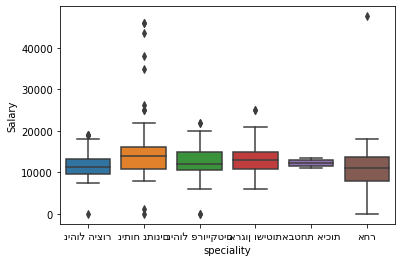

In [142]:
sns.boxplot(x="speciality", y="Salary", data=industriel_data_df[industriel_data_df.Status == "בוגר/ת"])

## Lets get to know the data:

### The relation between the amount of students and the amount of graduates that answered the survey:

In [88]:
#This code below gives only a pie plot... we will use the code on the next box that gives us 2 figures:
#temp=industriel_data_df.groupby('Status')['Status'].count().sort_values()
#temp.rename({'בוגר/ת':'Graduates','סטודנט/ית':'Students'}).plot.pie(y="percentage",figsize=(6,6),autopct='%1.1f%%',legend=False)
#plt.title("Students vs. Graduates",fontdict = font1)

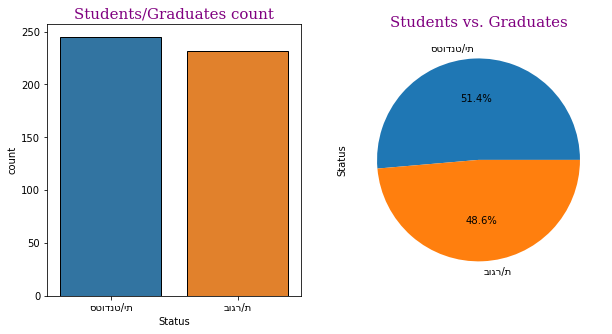

In [89]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.title("Students/Graduates count" ,fontdict = font2) 
sns.countplot( x="Status", data=industriel_data_df , edgecolor = 'black')
plt.subplot(1,2,2)
plt.title("Students vs. Graduates" ,fontdict = font2)
industriel_data_df['Status'].value_counts().plot.pie(autopct='%1.1f%%')

plt.show()

### The division between the different facilities:

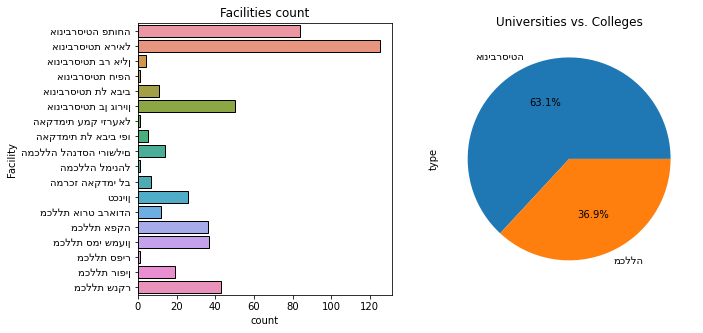

In [90]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.title("Facilities count") 
sns.countplot( y="Facility", data=industriel_data_df , edgecolor = 'black')
plt.subplot(1,2,2)
plt.title("Universities vs. Colleges")
industriel_data_df['type'].value_counts().plot.pie(autopct='%1.1f%%')

plt.show()

In [91]:
student = industriel_data_df.loc[industriel_data_df.Status == 'סטודנט/ית']
graduate = industriel_data_df.loc[industriel_data_df.Status == 'בוגר/ת']

## Getting to understand what affects the salary:

### Mean salary per facility:

In [92]:
counts = pd.value_counts(industriel_data_df.Facility)

In [93]:
#grouped=industriel_data_df.groupby("Facility").Salary.mean()

#g1=grouped.rename(index={'אוניברסיטה פתוחה':'Open University','אוניברסיטת אריאל':'Ariel Unuversity','המכללה למינהל':'College of Management','בן גוריון':'Ben-Gurion University','אוניברסיטת בר אילן':'Bar-Ilan University','אוניברסיטת תל אביב':'Tel Aviv University','מכללת שנקר':'Shenkar College','טכניון':'Technion','מכללת ספיר':'Sapir Academic College','מכללת אורט בראודה':'ORT Braude College','מכללת סמי שמעון':'Sami Shamoon College','מכללת רופין':'Ruppin Academic Center','האקדמית עמק יזרעאל':'Yezreel Valley College','המכללה להנדסה ירושלים':'College of Engineering Jerusalem','מכללת אפקה':'Afeka College','אוניברסיטת חיפה':'University of Haifa','האקדמית תל אביב יפו':'Tel Aviv-Yafo Academic College','המרכז האקדמי לב':'Lev Academic Center'}).plot(figsize=(15,5),kind="bar",color="lightblue",legend=False)

#plt.title("Mean Salary Per Facility",fontdict = font1)
#g1.set_xlabel("Facility",fontdict = font2)
#g1.set_ylabel("Salary",fontdict = font2)

#להוריד את מי שכתב מוסד ממש טוב/ לא מהנדס- הנדסאי בעמודת המוסד

## Salary per graduate for colleges:
#### We are working only with the colleges that 10+ people filled in the survey

In [104]:
counts = pd.value_counts(industriel_data_df.Facility)
industriel_data_df_filter = industriel_data_df.loc[industriel_data_df.Facility.isin(counts[counts > 10].index), :]
industriel_data_df_filter = industriel_data_df_filter[industriel_data_df_filter.Status == "בוגר/ת"]
industriel_data_df_filter = industriel_data_df_filter[industriel_data_df_filter.type == "מכללה"]

Text(0, 0.5, 'Salary')

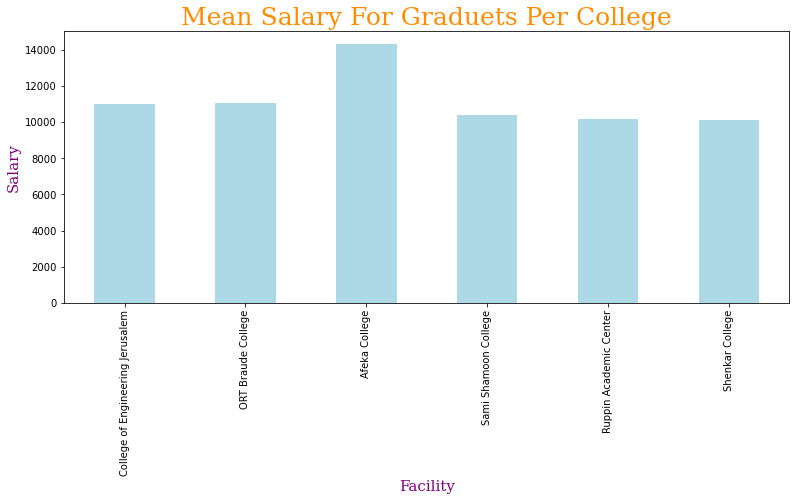

In [105]:
g2=industriel_data_df_filter.groupby("Facility").Salary.mean().rename(index={'אוניברסיטה פתוחה':'Open University','אוניברסיטת אריאל':'Ariel Unuversity','אוניברסיטת בן גוריון':'Ben-Gurion University','אוניברסיטת בר אילן':'Bar-Ilan University','אוניברסיטת חיפה':'University of Haifa','אוניברסיטת תל אביב':'Tel Aviv University','האקדמית עמק יזרעאל':'Yezreel Valley College','מכללת שנקר':'Shenkar College','טכניון':'Technion','מכללת ספיר':'Sapir Academic College','מכללת אורט בראודה':'ORT Braude College','מכללת סמי שמעון':'Sami Shamoon College','מכללת רופין':'Ruppin Academic Center','האקדמית עמק יזרעאל':'Yezreel Valley College','האקדמית תל אביב יפו':'Tel Aviv-Yafo Academic College','המכללה להנדסה ירושלים':'College of Engineering Jerusalem','מכללת אפקה':'Afeka College','האקדמית תל אביב יפו':'Tel Aviv-Yafo Academic College'}).plot(figsize=(13,5),kind="bar",color="lightblue")
plt.title("Mean Salary For Graduets Per College",fontdict = font1)
g2.set_xlabel("Facility",fontdict = font2)
g2.set_ylabel("Salary",fontdict = font2)

## Salary per graduate for universities:
#### We are working only with the colleges that 10+ people filled in the survey

In [106]:
counts = pd.value_counts(industriel_data_df.Facility)
industriel_data_df_filter = industriel_data_df.loc[industriel_data_df.Facility.isin(counts[counts > 10].index), :]
industriel_data_df_filter = industriel_data_df_filter[industriel_data_df_filter.Status == "בוגר/ת"]
industriel_data_df_filter = industriel_data_df_filter[industriel_data_df_filter.type == "אוניברסיטה"]

Text(0, 0.5, 'Salary')

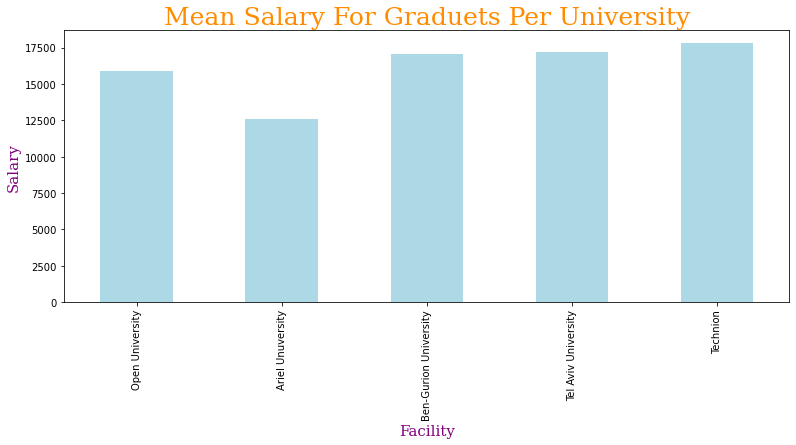

In [107]:
g2=industriel_data_df_filter.groupby("Facility").Salary.mean().rename(index={'אוניברסיטה פתוחה':'Open University','אוניברסיטת אריאל':'Ariel Unuversity','אוניברסיטת בן גוריון':'Ben-Gurion University','אוניברסיטת בר אילן':'Bar-Ilan University','אוניברסיטת חיפה':'University of Haifa','אוניברסיטת תל אביב':'Tel Aviv University','האקדמית עמק יזרעאל':'Yezreel Valley College','מכללת שנקר':'Shenkar College','טכניון':'Technion','מכללת ספיר':'Sapir Academic College','מכללת אורט בראודה':'ORT Braude College','מכללת סמי שמעון':'Sami Shamoon College','מכללת רופין':'Ruppin Academic Center','האקדמית עמק יזרעאל':'Yezreel Valley College','האקדמית תל אביב יפו':'Tel Aviv-Yafo Academic College','המכללה להנדסה ירושלים':'College of Engineering Jerusalem','מכללת אפקה':'Afeka College','האקדמית תל אביב יפו':'Tel Aviv-Yafo Academic College'}).plot(figsize=(13,5),kind="bar",color="lightblue")
plt.title("Mean Salary For Graduets Per University",fontdict = font1)
g2.set_xlabel("Facility",fontdict = font2)
g2.set_ylabel("Salary",fontdict = font2)

## Salary per students:
#### We are working only with the colleges that 10+ people filled in the survey

In [108]:
counts = pd.value_counts(industriel_data_df.Facility)
industriel_data_df_filter = industriel_data_df.loc[industriel_data_df.Facility.isin(counts[counts > 10].index), :]
industriel_data_df_filter = industriel_data_df_filter[industriel_data_df_filter.Status == "סטודנט/ית"]

Text(0, 0.5, 'Salary')

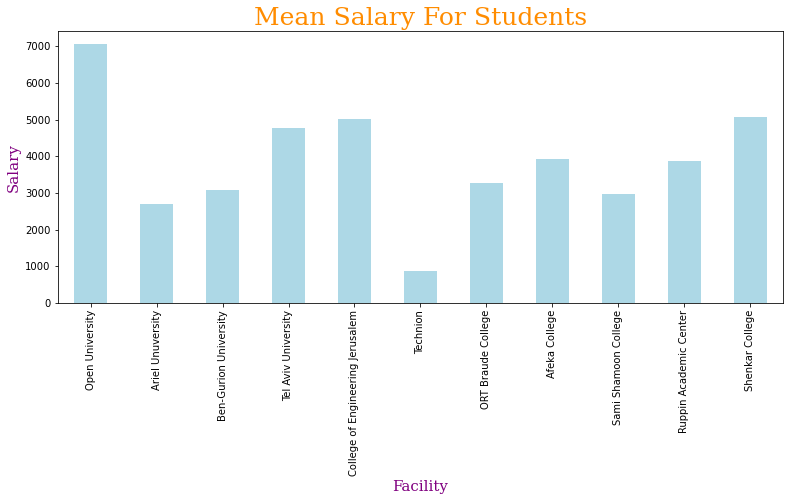

In [109]:
g3=industriel_data_df_filter.groupby("Facility").Salary.mean().rename(index={'אוניברסיטה פתוחה':'Open University','אוניברסיטת אריאל':'Ariel Unuversity','אוניברסיטת בן גוריון':'Ben-Gurion University','אוניברסיטת בר אילן':'Bar-Ilan University','אוניברסיטת חיפה':'University of Haifa','אוניברסיטת תל אביב':'Tel Aviv University','האקדמית עמק יזרעאל':'Yezreel Valley College','מכללת שנקר':'Shenkar College','טכניון':'Technion','מכללת ספיר':'Sapir Academic College','מכללת אורט בראודה':'ORT Braude College','מכללת סמי שמעון':'Sami Shamoon College','מכללת רופין':'Ruppin Academic Center','האקדמית עמק יזרעאל':'Yezreel Valley College','האקדמית תל אביב יפו':'Tel Aviv-Yafo Academic College','המכללה להנדסה ירושלים':'College of Engineering Jerusalem','מכללת אפקה':'Afeka College','האקדמית תל אביב יפו':'Tel Aviv-Yafo Academic College'}).plot(figsize=(13,5),kind="bar",color="lightblue")
plt.title("Mean Salary For Students",fontdict = font1)
g3.set_xlabel("Facility",fontdict = font2)
g3.set_ylabel("Salary",fontdict = font2)

## Mean salary in universities vs in colleges:

In [119]:
# we need to add a plot that shoes the differnece brfore we part the data to a section of university and a section of college

In [120]:
industriel_data_df_filter = industriel_data_df_filter[industriel_data_df_filter.Status == "בוגר/ת"]

In [121]:
salary_university = industriel_data_df_filter[industriel_data_df_filter.type == 'אוניברסיטה'].groupby("Facility").Salary.mean()
#salary_university

In [122]:
salary_college = industriel_data_df_filter[industriel_data_df_filter.type == 'מכללה'].groupby("Facility").Salary.mean()
#salary_college

In [123]:
#all_universities=(['אוניברסיטה פתוחה', 'אוניברסיטת אריאל', 'אוניברסיטת בר אילן', 'אוניברסיטת חיפה', 'אוניברסיטת תל אביב', 'אוניברסיטת בן גוריון', 'טכניון'])
#all_colleges=[('האקדמית עמק יזראל', 'האקדמית תל אביב יפו', 'המכללה להנדסה ירושלים', 'המכללה למינהל', 'המרכז האקדמי לב', 'מכללת אורט בראודה', 'מכללת אפקה', 'מכללת סמי שמעון', 'מכללת ספיר', 'מכללת רופין', 'מכללת שנקר')]
#plt.figure(figsize=(10, 5))
#plt.subplot(1,2,1)
#plt.title("Universities vs Salary")
#sns.barplot(x=salary_university[all_universities].mean(),y=salary_university[all_universities].columns, edgecolor = 'black')
#plt.subplot(1,2,2)
#plt.title("Colleges vs Salary")
#g =sns.barplot(x=salary_college[all_colleges].mean(),y=salary_college[all_colleges].columns, edgecolor = 'black')
#g.set(xlim=(0, 0.5))
#plt.tight_layout()
#plt.show()

### With more experience is there less affection for the facility on the salary:

In [124]:
#order=["1","2+","10+"]
#sns.countplot(x="Experience", hue="Salary" , data=industriel_data_df, palette="Set1", edgecolor = 'black' ,order = order)
#plt.show()

In [125]:
#fig, ax=plt.subplots(1,2,figsize=(10,5))
#sns.regplot(x='Facility',y='Salary', data=industriel_data_df, ax=ax[0])
#sns.regplot(x='Experience',y='Salary', data=industriel_data_df, ax=ax[1])
#plt.subplots_adjust(wspace=0.5)

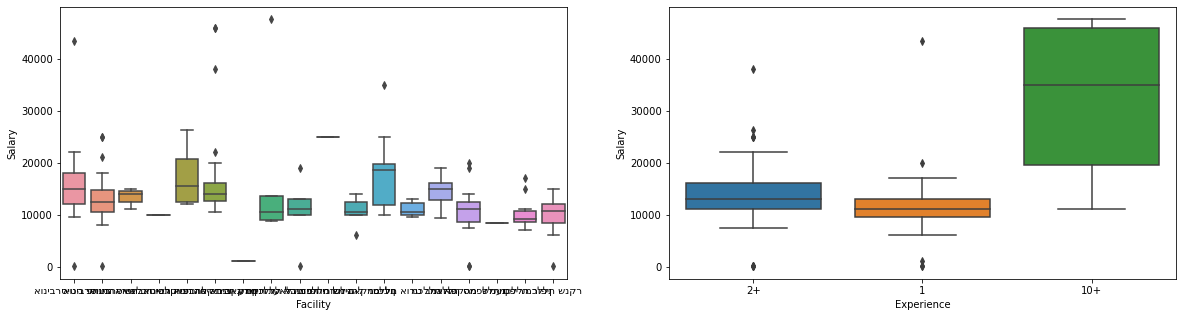

In [133]:
fig, axes=plt.subplots(1,2,figsize=(20,5))
plt.subplots_adjust(wspace=0.2)
sns.boxplot(x="Facility", y="Salary", data=industriel_data_df[industriel_data_df.Status == "בוגר/ת"], ax=axes[0])
sns.boxplot(x="Experience", y="Salary", data=industriel_data_df[industriel_data_df.Status == "בוגר/ת"], ax=axes[1])
plt.show()

In [ ]:
# maybe we should give each boxplot from above her own space and not put them side by side

## After we figured the connection between facility & salary and the connection between experience & salary- lets see:
### How much does the impact of the institution decrease as the years of experience increase

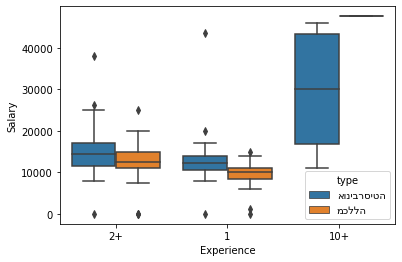

In [134]:
sns.boxplot(x="Experience", y="Salary", hue="type", data=industriel_data_df[industriel_data_df.Status == "בוגר/ת"])

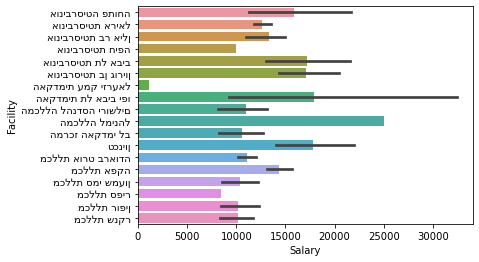

In [48]:
sns.barplot(x="Salary", y="Facility", data=industriel_data_df[industriel_data_df.Status == "בוגר/ת"])

#### salary vs college:

Text(0, 0.5, 'Salary')

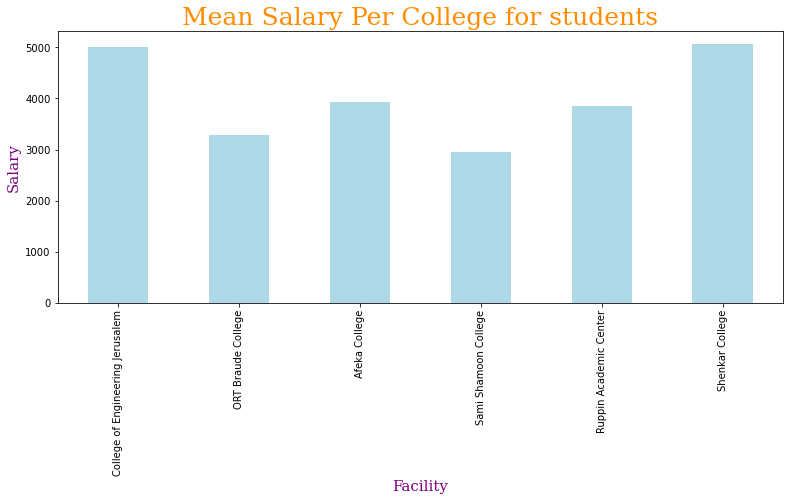

In [113]:
g3=industriel_data_df_filter[industriel_data_df_filter.type == 'מכללה'].groupby("Facility").Salary.mean().rename(index={'אוניברסיטה פתוחה':'Open University','אוניברסיטת אריאל':'Ariel Unuversity','אוניברסיטת בן גוריון':'Ben-Gurion University','אוניברסיטת בר אילן':'Bar-Ilan University','אוניברסיטת חיפה':'University of Haifa','אוניברסיטת תל אביב':'Tel Aviv University','האקדמית עמק יזרעאל':'Yezreel Valley College','מכללת שנקר':'Shenkar College','טכניון':'Technion','מכללת ספיר':'Sapir Academic College','מכללת אורט בראודה':'ORT Braude College','מכללת סמי שמעון':'Sami Shamoon College','מכללת רופין':'Ruppin Academic Center','האקדמית עמק יזרעאל':'Yezreel Valley College','האקדמית תל אביב יפו':'Tel Aviv-Yafo Academic College','המכללה להנדסה ירושלים':'College of Engineering Jerusalem','מכללת אפקה':'Afeka College','האקדמית תל אביב יפו':'Tel Aviv-Yafo Academic College'}).plot(figsize=(13,5),kind="bar",color="lightblue")
plt.title("Mean Salary Per College for students",fontdict = font1)
g3.set_xlabel("Facility",fontdict = font2)
g3.set_ylabel("Salary",fontdict = font2)

#### salary vs university for students:

Text(0, 0.5, 'Salary')

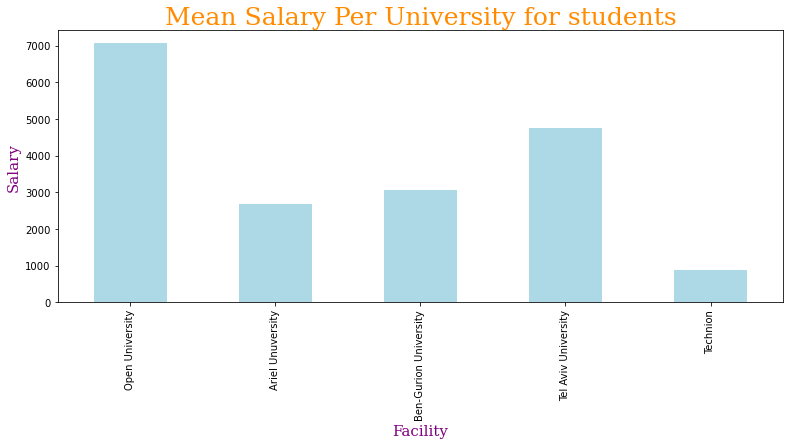

In [114]:
g3=industriel_data_df_filter[industriel_data_df_filter.type == 'אוניברסיטה'].groupby("Facility").Salary.mean().rename(index={'אוניברסיטה פתוחה':'Open University','אוניברסיטת אריאל':'Ariel Unuversity','אוניברסיטת בן גוריון':'Ben-Gurion University','אוניברסיטת בר אילן':'Bar-Ilan University','אוניברסיטת חיפה':'University of Haifa','אוניברסיטת תל אביב':'Tel Aviv University','האקדמית עמק יזרעאל':'Yezreel Valley College','מכללת שנקר':'Shenkar College','טכניון':'Technion','מכללת ספיר':'Sapir Academic College','מכללת אורט בראודה':'ORT Braude College','מכללת סמי שמעון':'Sami Shamoon College','מכללת רופין':'Ruppin Academic Center','האקדמית עמק יזרעאל':'Yezreel Valley College','האקדמית תל אביב יפו':'Tel Aviv-Yafo Academic College','המכללה להנדסה ירושלים':'College of Engineering Jerusalem','מכללת אפקה':'Afeka College','האקדמית תל אביב יפו':'Tel Aviv-Yafo Academic College'}).plot(figsize=(13,5),kind="bar",color="lightblue")
plt.title("Mean Salary Per University for students",fontdict = font1)
g3.set_xlabel("Facility",fontdict = font2)
g3.set_ylabel("Salary",fontdict = font2)

In [115]:
#industriel_data_df_filter[industriel_data_df_filter.type == 'אוניברסיטה'].groupby("Facility").Salary.mean().plot(kind="bar")

2

In [116]:
pd.unique(industriel_data_df.Experience)

array(['2+', '1', '10+'], dtype=object)

In [117]:
pd.value_counts(industriel_data_df.Experience)

1      287
2+     180
10+     10
Name: Experience, dtype: int64

#### Amount vs Experience per type of facility:

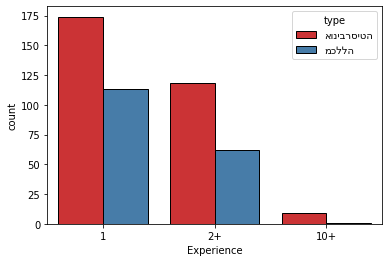

In [118]:
order=["1","2+","10+"]
sns.countplot(x="Experience", hue="type" , data=industriel_data_df, palette="Set1", edgecolor = 'black' ,order = order)
plt.show()

#### Salary distribution for graduets:

In [119]:
counts = pd.value_counts(industriel_data_df.Facility)
industriel_data_df_filter = industriel_data_df.loc[industriel_data_df.Facility.isin(counts[counts > 10].index), :]
industriel_data_df_filter = industriel_data_df_filter[industriel_data_df_filter.Status == "בוגר/ת"]

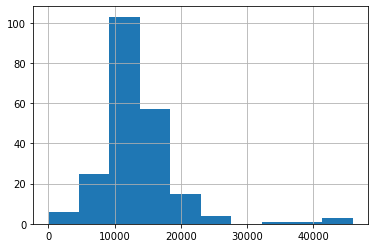

In [141]:
counts = pd.value_counts(industriel_data_df.Facility)
industriel_data_df_filter = industriel_data_df.loc[industriel_data_df.Facility.isin(counts[counts > 10].index), :]
industriel_data_df_filter = industriel_data_df_filter[industriel_data_df_filter.Status == "בוגר/ת"]
industriel_data_df_filter.Salary.hist()